**2. zadatak**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sign
from scipy.interpolate import lagrange

In [10]:
def f(x):
  return np.log(x) - 1 + 1/x

In [11]:
a, b = 2, 10
m = 9
x=np.linspace(a,b,m)
y=f(x)

a) lagrange

Lagrangeov interpolant P(x):
           8             7             6            5           4
1.098e-07 x - 5.809e-06 x + 0.0001324 x - 0.001693 x + 0.01319 x
           3          2
 - 0.0626 x + 0.1568 x + 0.06756 x - 0.2328


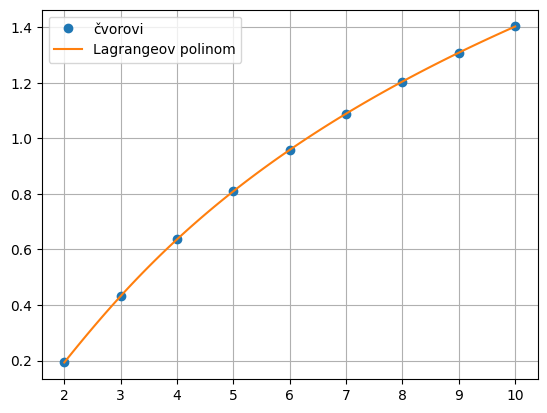

In [12]:
# Lagrangeov interpolant
P = lagrange(x, y)

# Ispis interpolacijskog polinoma
print("Lagrangeov interpolant P(x):")
print(P)

# evaluacija
x_new = np.linspace(a, b, 100)
y_new = P(x_new)

plt.plot(x, y, "o", label="čvorovi")
plt.plot(x_new, y_new, "-", label="Lagrangeov polinom")
plt.grid(True)
plt.legend()
plt.show()



b) aproksimacija

Q =
 [[-3.33333333e-01 -5.16397779e-01  5.31816023e-01  4.44949208e-01]
 [-3.33333333e-01 -3.87298335e-01  1.32954006e-01 -2.22474604e-01]
 [-3.33333333e-01 -2.58198890e-01 -1.51947435e-01 -4.13167122e-01]
 [-3.33333333e-01 -1.29099445e-01 -3.22888300e-01 -2.86038777e-01]
 [-3.33333333e-01  2.77555756e-17 -3.79868588e-01  2.77555756e-16]
 [-3.33333333e-01  1.29099445e-01 -3.22888300e-01  2.86038777e-01]
 [-3.33333333e-01  2.58198890e-01 -1.51947435e-01  4.13167122e-01]
 [-3.33333333e-01  3.87298335e-01  1.32954006e-01  2.22474604e-01]
 [-3.33333333e-01  5.16397779e-01  5.31816023e-01 -4.44949208e-01]]
R =
 [[   -3.           -18.          -128.         -1008.        ]
 [    0.             7.74596669    92.95160031   927.96680975]
 [    0.             0.            17.54992877   315.89871795]
 [    0.             0.             0.           -37.75711853]]
Rjesenje najmanjih kvadrata x* = [ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
Norma reziduala (Residual norm) = 0.002802888029048895


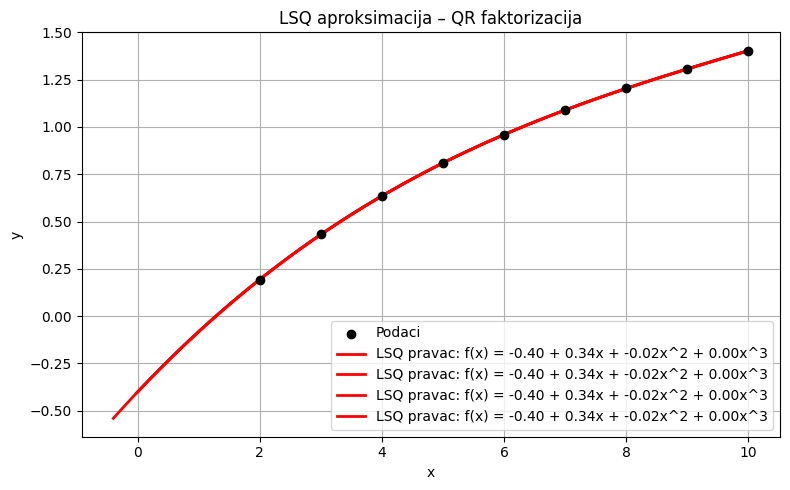

a0 = -0.4006372412024195
a1 = 0.3415183338456701
a2 = -0.023665304362266836
a3 = 0.000755490358898752

LSQ pravac: f(x) = -0.4006 + 0.3415 x + -0.02x^2 + 0.00x^3


In [22]:
J = np.column_stack([np.ones_like(x), x,x**2,x**3])

# QR faktorizacija
Q, R = np.linalg.qr(J)
a = np.linalg.solve(R, Q.T @ y)

# LSQ model
def f_ls(x):
    return a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3

# Priprema podataka za crtanje
xx = np.linspace(a,b, 300)
res_qr = np.linalg.norm(J @ a - y)
print("Q =\n", Q)
print("R =\n", R)
print("Rjesenje najmanjih kvadrata x* =", x)
print("Norma reziduala (Residual norm) =", res_qr)

# Crtanje
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='black', label='Podaci', zorder=3)
plt.plot(xx, f_ls(xx), color='red', linewidth=2,
         label=f"LSQ pravac: f(x) = {a[0]:.2f} + {a[1]:.2f}x + {a[2]:.2f}x^2 + {a[3]:.2f}x^3")

plt.title("LSQ aproksimacija – QR faktorizacija")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("a0 =", a[0])
print("a1 =", a[1])
print("a2 =", a[2])
print("a3 =", a[3])
print(f"\nLSQ pravac: f(x) = {a[0]:.4f} + {a[1]:.4f} x + {a[2]:.2f}x^2 + {a[3]:.2f}x^3")

c) ksi=5.25

In [29]:
ksi=5.25

print(P(ksi))
print(f_ls(ksi))
e_P=np.abs(P(ksi)-f(ksi))
e_LSQ=np.abs(f_ls(ksi)-f(ksi))
rel_P=abs(P(ksi)-f(ksi))/abs(f(ksi))
rel_LSQ=abs(f_ls(ksi)-f(ksi))/abs(f(ksi))
print(e_P)
print(e_LSQ)
print(rel_P)
print(rel_LSQ)

0.8487007052103572
0.8493808758423899
3.5618693656758182e-06
0.0006766087626669526
4.1968321638487e-06
0.0007972255930738657


d)

e)

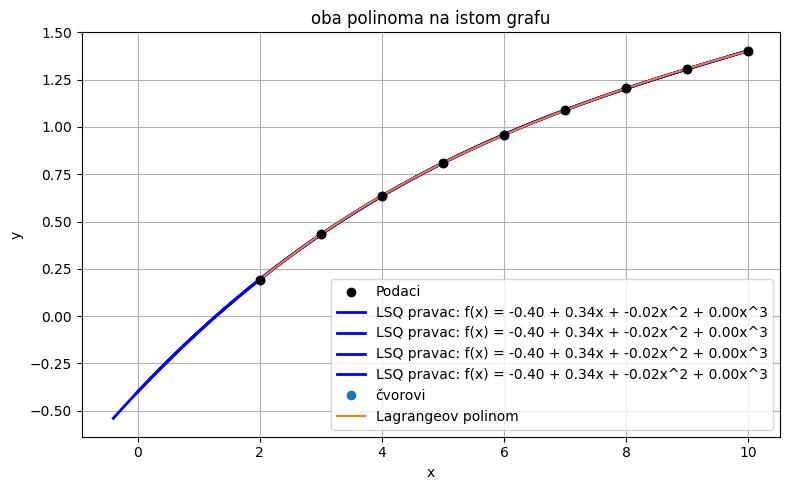

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='black', label='Podaci', zorder=3)
plt.plot(xx, f_ls(xx), color='blue', linewidth=2,
         label=f"LSQ pravac: f(x) = {a[0]:.2f} + {a[1]:.2f}x + {a[2]:.2f}x^2 + {a[3]:.2f}x^3")

plt.title("oba polinoma na istom grafu")
plt.plot(x, y, "o", label="čvorovi")
plt.plot(x_new, y_new, "-", label="Lagrangeov polinom")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

oba polinoma daju istu sliku

f)